# Spam DATABASE PDA


In [77]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import xgboost 
from sklearn.metrics import accuracy_score
import re
import collections
import joblib

In [19]:
df= pd.read_csv("/Users/sou/Desktop/PROJETPYTHON/spambase/spambase.data",header=None)

In [90]:
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_pointvirgule,c_freq_parenthèse,c_freq_crochet,c_freq_point_exclamation,c_freq_dollar,c_freq_diese,capital_run_length_average,capital_run_length_longest,capital_run_length_total,SPAM
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [20]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [60]:
df.columns=["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_pointvirgule","c_freq_parenthèse","c_freq_crochet","c_freq_point_exclamation","c_freq_dollar","c_freq_diese","capital_run_length_average","capital_run_length_longest","capital_run_length_total","SPAM"]   

In [61]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_pointvirgule,c_freq_parenthèse,c_freq_crochet,c_freq_point_exclamation,c_freq_dollar,c_freq_diese,capital_run_length_average,capital_run_length_longest,capital_run_length_total,SPAM
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [23]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [24]:
df['SPAM'].value_counts()

0    2788
1    1813
Name: SPAM, dtype: int64

<AxesSubplot:xlabel='SPAM', ylabel='capital_run_length_total'>

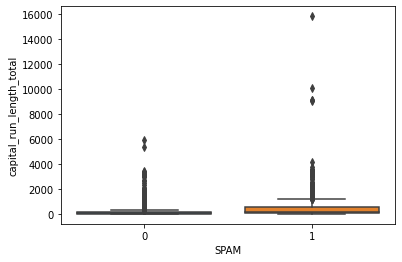

In [25]:
sns.boxplot(x="SPAM", y="capital_run_length_total", data=df)

Number of SPAM:  2788
Number of non SPAM :  1813


/Users/sou/Desktop/PROJETPYTHON/monvenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


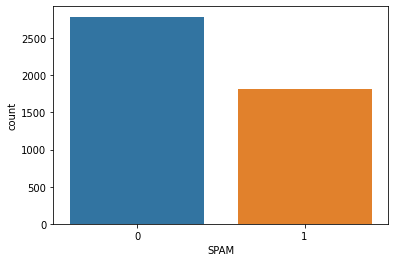

In [26]:
ax = sns.countplot(df['SPAM'],label="Count")
B, M = df['SPAM'].value_counts()
print('Number of SPAM: ',B)
print('Number of non SPAM : ',M)

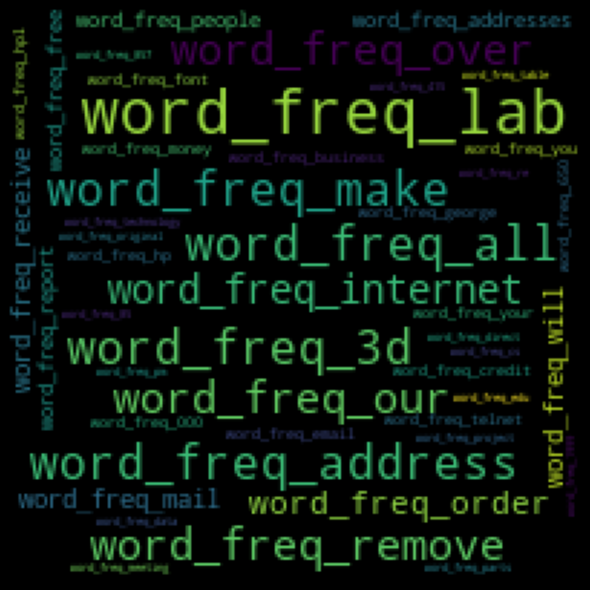

In [11]:
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=200, height=200).generate(" ".join(df))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Data Preprocessing

In [27]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df, df['SPAM'], test_size = 0.25, random_state = 223)
xTrain=xTrain.drop('SPAM',axis=1)
xTest= xTest.drop('SPAM',axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xTrain)
scaler.fit(xTest)
x_Train_scale= scaler.transform(xTrain)
x_Test_scale= scaler.transform(xTest)

<AxesSubplot:>

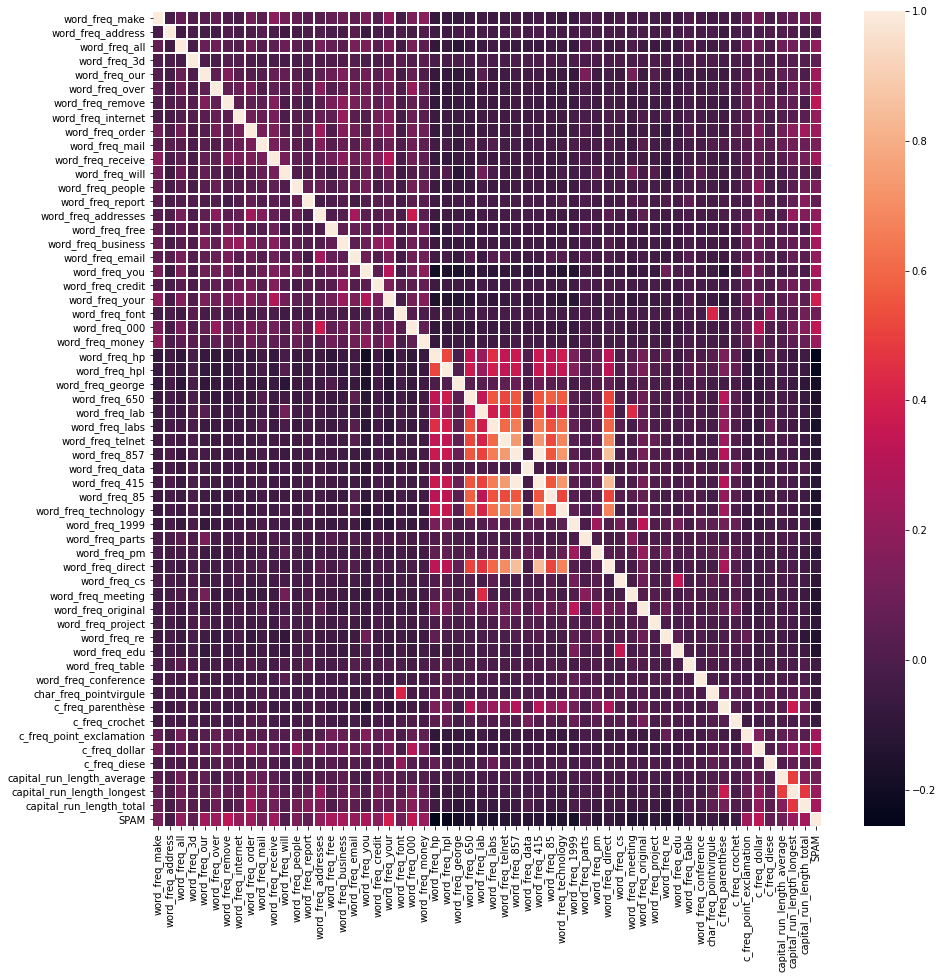

In [116]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),linewidths=.5, fmt= '.1f',ax=ax)

In [126]:
def get_feature_correlation(df, top_n=None, corr_method='spearman',
                            remove_duplicates=True, remove_self_correlations=True):
    """
    Compute the feature correlation and sort feature pairs based on their correlation

    :param df: The dataframe with the predictor variables
    :type df: pandas.core.frame.DataFrame
    :param top_n: Top N feature pairs to be reported (if None, all of the pairs will be returned)
    :param corr_method: Correlation compuation method
    :type corr_method: str
    :param remove_duplicates: Indicates whether duplicate features must be removed
    :type remove_duplicates: bool
    :param remove_self_correlations: Indicates whether self correlations will be removed
    :type remove_self_correlations: bool

    :return: pandas.core.frame.DataFrame
    """
    corr_matrix_abs = df.corr(method=corr_method).abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us \
        .sort_values(kind="quicksort", ascending=False) \
        .reset_index()
     # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)'] 

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

In [127]:
get_feature_correlation(df)

,Feature 1,Feature 2,Correlation (abs)
58,word_freq_415,word_freq_857,0.957845
60,capital_run_length_average,capital_run_length_longest,0.863186
62,capital_run_length_longest,capital_run_length_total,0.859032
64,word_freq_hpl,word_freq_hp,0.758409
66,word_freq_857,word_freq_telnet,0.731868
...,...,...,...
3352,word_freq_business,word_freq_1999,0.000438
3354,word_freq_415,word_freq_cs,0.000347
3356,word_freq_85,word_freq_cs,0.000347
3358,word_freq_conference,word_freq_email,0.000241


## Modèle ##

# Linear Regression

In [32]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xTrain,yTrain)
prediction_LR=LR.predict(xTest)
accuracy_LR= accuracy_score(yTest, prediction_LR)
accuracy_LR

/Users/sou/Desktop/PROJETPYTHON/monvenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9296264118158123

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=11)
RF.fit(xTrain,yTrain)
prediction_RF=RF.predict(xTest)
accuracy_RF=accuracy_score(yTest,prediction_RF)
accuracy_RF


0.9556907037358818

# Xgboosting

In [53]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGB = XGBClassifier()
XGB.fit(xTrain, yTrain)
y_pred = XGB.predict(xTest)
accuracy = accuracy_score(yTest, y_pred)
accuracy

/Users/sou/Desktop/PROJETPYTHON/monvenv/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:09:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9565595134665508

# Neural Network

In [134]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[57]),
    layers.Dense(4, activation='relu'), 
    layers.Dense(1, activation='sigmoid'),
])

In [135]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [136]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    xTrain, yTrain,validation_data=(xTest, yTest),
    batch_size=2000,
    epochs=10000,
    callbacks=[early_stopping] # hide the output because we have so many epochs
)

Epoch 1/10000
2/2 [==============================] - 1s 240ms/step - loss: 3.2890 - binary_accuracy: 0.6077 - val_loss: 3.1072 - val_binary_accuracy: 0.5986
Epoch 2/10000
2/2 [==============================] - 0s 59ms/step - loss: 2.6303 - binary_accuracy: 0.5905 - val_loss: 2.5525 - val_binary_accuracy: 0.5960
Epoch 3/10000
2/2 [==============================] - 0s 60ms/step - loss: 2.1687 - binary_accuracy: 0.5794 - val_loss: 2.0431 - val_binary_accuracy: 0.5699
Epoch 4/10000
2/2 [==============================] - 0s 64ms/step - loss: 1.6359 - binary_accuracy: 0.5570 - val_loss: 1.5848 - val_binary_accuracy: 0.5456
Epoch 5/10000
2/2 [==============================] - 0s 72ms/step - loss: 1.3561 - binary_accuracy: 0.5498 - val_loss: 1.1923 - val_binary_accuracy: 0.5143
Epoch 6/10000
2/2 [==============================] - 0s 73ms/step - loss: 1.0853 - binary_accuracy: 0.5231 - val_loss: 0.9197 - val_binary_accuracy: 0.5013
Epoch 7/10000
2/2 [==============================] - 0s 75ms/st

Best Validation Loss: 0.1938
Best Validation Accuracy: 0.9374


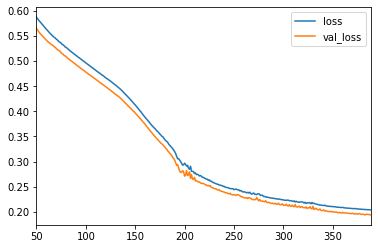

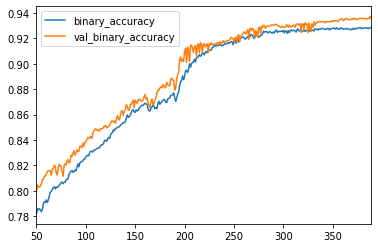

In [137]:
history_df = pd.DataFrame(history.history)
# On commence à ploter à partir du plot 1000
history_df.loc[50:, ['loss', 'val_loss']].plot()
history_df.loc[50:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [138]:
# Évaluer le modèle sur les données de test en utilisant "evaluate".
print("Evaluer sur le test data")
results = model.evaluate(xTest, yTest, batch_size=128)
print("test loss, test acc:", results)

Evaluer sur le test data
9/9 [==============================] - 0s 1ms/step - loss: 0.1947 - binary_accuracy: 0.9357
test loss, test acc: [0.19468481838703156, 0.9357081055641174]


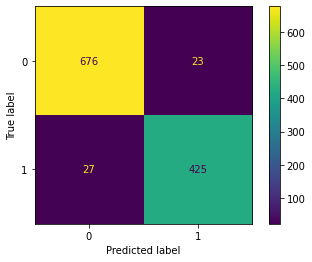

In [54]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
c=confusion_matrix(yTest,y_pred)
ConfusionMatrixDisplay(c).plot()

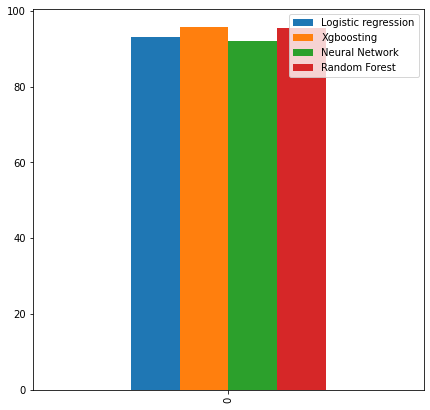

In [45]:
names=["Logistic regression","Xgboosting","Neural Network",'Random Forest']
results=[93,95.7,92,95.5]
dictionnaire=dict(zip(names,results))
ax=pd.DataFrame(data=[dictionnaire]).plot.bar(figsize=[7,7])

<AxesSubplot:title={'center':'Features importances'}>

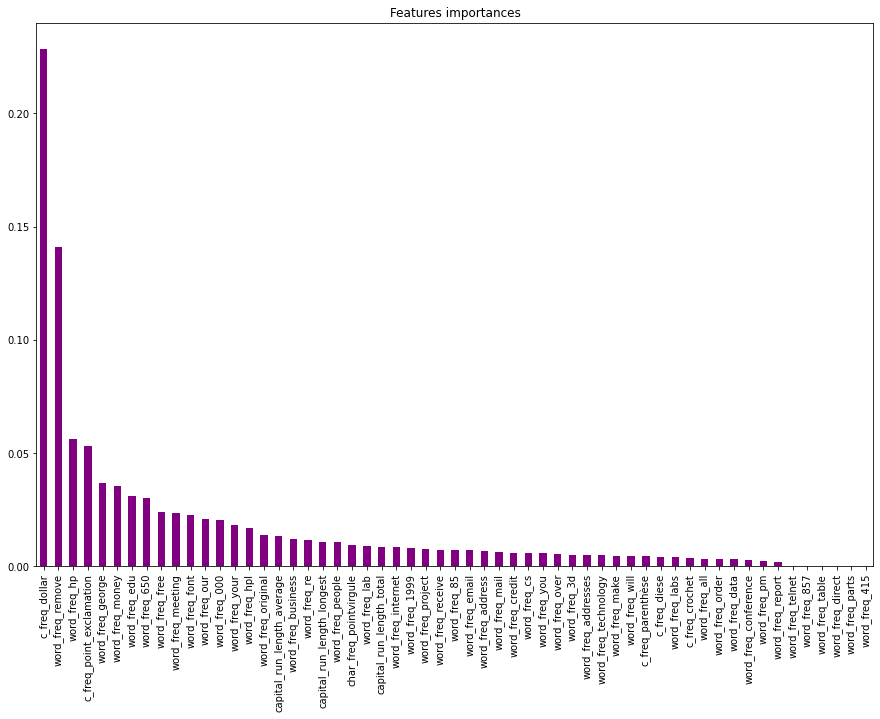

In [70]:
imp=pd.Series(importance,df.columns[0:57]).sort_values(ascending=False)
fig,axe=plt.subplots(figsize=(15,10))
imp.plot.bar(title="Features importances",color='purple')

## Test of the function to transform a mail to features 

In [92]:

def txt_features(text):
    features = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
    dic = {}
    splitxt = re.split(r'\W+', text)
    splitxt_count = collections.Counter(splitxt)
    
    for i in range(48):
        if features[i] in splitxt_count.keys() : dic[features[i]] = 100*splitxt_count[features[i]]/len(splitxt)
        else : dic[features[i]] = float(0)

    for i in range(48,54):
        dic[features[i]] = 100*text.count(features[i])/(len(text)- text.count(' '))

    all_uppercase_sequence = re.findall(r"[A-Z]+", text)
    sum_uppercase = 0

    for sequence in all_uppercase_sequence:
        sum_uppercase += len(sequence)

    if(len(all_uppercase_sequence )!=0):
        dic['capital_run_length_average'] = sum_uppercase/len(all_uppercase_sequence)
        dic['capital_run_length_longest'] = len(max(all_uppercase_sequence, key=len))
        dic['capital_run_length_total'] = sum_uppercase

    else:
        dic['capital_run_length_average']=0
        dic['capital_run_length_longest']=0
        dic['capital_run_length_total']=0

    a= pd.DataFrame(np.array(list(dic.values())).reshape(1,-1))

    a.columns= ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_pointvirgule","c_freq_parenthèse","c_freq_crochet","c_freq_point_exclamation","c_freq_dollar","c_freq_diese","capital_run_length_average","capital_run_length_longest","capital_run_length_total"]

    return a 


text="Hello, this is not a spam"
txt_features(text)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_pointvirgule,c_freq_parenthèse,c_freq_crochet,c_freq_point_exclamation,c_freq_dollar,c_freq_diese,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


### Export Xgboosting model with joblib

In [85]:
joblib.dump(XGB,'xgb_save')

['RF_save']

### Export LR model 


In [ ]:
joblib.dump(LR_model,'model1_save')